In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os.path as osp
import pandas as pd
from scipy.linalg import block_diag
from sklearn.metrics import r2_score
import matplotlib.colors as mcolors

In [2]:
friction_coeff_matrix = np.array([[0.09041, 0.1,    0.09041],
                                  [0.1,    0.09041, 0.09041],
                                  [0.1,   0.1568, 0.1]])

In [76]:
# Create a discrete colormap
cmap = plt.get_cmap('Greys_r', 4)  # 'Greys_r' with 5 discrete colors

# Define the boundaries for each color bin (corresponding to friction values)
# boundaries = [0.0904, 0.09042, 0.10001, 0.15681]
boundaries = [0.0904, 0.0950, 0.1050, 0.15681]
norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)

In [77]:
friction_coeff_normalized = friction_coeff_matrix / \
    np.max(friction_coeff_matrix)

In [78]:
data_path = '../data'

In [79]:
time = joblib.load(osp.join(data_path, 'time.bin'))

In [80]:
state_wls = joblib.load(osp.join(data_path, 'WLS_state.bin'))
state_exp = joblib.load(osp.join(data_path, 'EXP_state.bin'))

In [81]:
des_state_wls = joblib.load(osp.join(data_path, 'WLS_des_state.bin'))
des_state_exp = joblib.load(osp.join(data_path, 'EXP_des_state.bin'))

In [82]:
target = np.array([-4, 1])
matches = np.all(des_state_wls[:2, :] == target[:, None], axis=0)

In [83]:
np.where(matches)[0]

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,  5150, 10150,
       15150, 20150, 25150])

In [84]:
lap_idx = np.array([15,  5150, 10150, 15150, 20150, 25150])

In [85]:
for i in range(len(lap_idx)-1):
    print(lap_idx[i], lap_idx[i+1])

15 5150
5150 10150
10150 15150
15150 20150
20150 25150


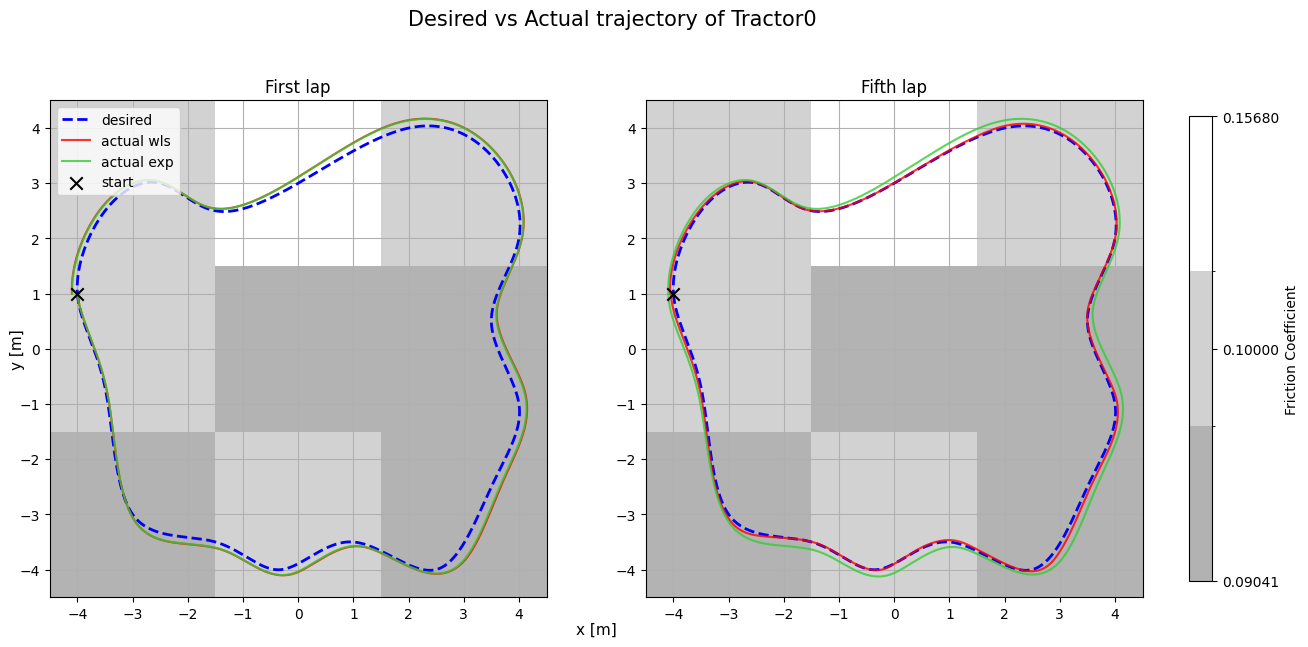

In [86]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("First lap")
ax[0].plot(des_state_wls[0, :][lap_idx[0]:lap_idx[1]],
           des_state_wls[1, :][lap_idx[0]:lap_idx[1]], label="desired", color="blue",  linestyle='dashed', linewidth=2)
ax[0].plot(state_wls[0, :][lap_idx[0]:lap_idx[1]],
           state_wls[1, :][lap_idx[0]:lap_idx[1]], label=f"actual wls", color="red", linewidth=1.5, alpha=0.8)
ax[0].plot(state_exp[0, :][lap_idx[0]:lap_idx[1]],
           state_exp[1, :][lap_idx[0]:lap_idx[1]], label=f"actual exp", color="limegreen", linewidth=1.5, alpha=0.8)

ax[0].grid(True)
ax[0].set_xlim(-4.5, 4.5)
ax[0].set_ylim(-4.5, 4.5)
# ax[0].axis("equal")
ax[0].set_xlabel('x [m]', fontsize=11)  # Set X label
ax[0].set_ylabel('y [m]', fontsize=11)  # Set Y label
ax[0].yaxis.set_label_coords(-0.05, 0.5)
ax[0].xaxis.set_label_coords(1.1, -0.05)

# Overlay the friction coefficient grid on the first subplot
friction_plot = ax[0].imshow(friction_coeff_matrix, cmap=cmap, norm=norm,
                             extent=[-4.5, 4.5, -4.5, 4.5], origin='lower', alpha=0.3)


ax[0].scatter([-4], [1], [80], zorder=10, marker="x",
              label="start", color='black')

# Position the Y label in the top left corner
# Adjust these values to fine-tune the position
ax[0].yaxis.set_label_coords(-0.05, 0.5)

# Position the X label in the middle of the plot
# Adjust these values to fine-tune the position
ax[0].xaxis.set_label_coords(1.1, -0.05)

ax[1].set_title("Fifth lap")
ax[1].plot(des_state_wls[0, :][lap_idx[0]:lap_idx[1]],
           des_state_wls[1, :][lap_idx[0]:lap_idx[1]], color="blue", linestyle='dashed', linewidth=2)
ax[1].plot(state_wls[0, :][lap_idx[-2]:lap_idx[-1]],
           state_wls[1, :][lap_idx[-2]:lap_idx[-1]], color="red", linewidth=1.5, alpha=0.8)
ax[1].plot(state_exp[0, :][lap_idx[-2]:lap_idx[-1]],
           state_exp[1, :][lap_idx[-2]:lap_idx[-1]], color="limegreen", linewidth=1.5, alpha=0.8)

ax[1].scatter([-4], [1], [80], zorder=10, marker="x", color='black')


ax[1].grid(True)
ax[1].set_xlim(-4.5, 4.5)
ax[1].set_ylim(-4.5, 4.5)
# ax[1].axis("equal")

# Overlay the friction coefficient grid on the second subplot
ax[1].imshow(friction_coeff_matrix, cmap=cmap, norm=norm,
             extent=[-4.5, 4.5, -4.5, 4.5], origin='lower', alpha=0.3)
# Add a colorbar with actual friction coefficient values

cbar = fig.colorbar(friction_plot, ax=ax,
                    orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Friction Coefficient')

cbar.set_ticks([0.09041, 0.1, 0.1568])
cbar.set_ticklabels([f'{tick:.5f}' for tick in [0.09041, 0.1, 0.1568]])

ax[0].legend(loc='upper left')
fig.suptitle("Desired vs Actual trajectory of Tractor0", fontsize=15)
plt.savefig(osp.join(data_path, "des_vs_actual_traj.pdf"),
            dpi=500, bbox_inches='tight')
plt.show()

In [53]:
beta_l_wls = joblib.load(osp.join(data_path, 'WLS_beta_l.bin'))
beta_l_pred_wls = joblib.load(osp.join(data_path, 'WLS_beta_l_pred.bin'))
beta_l_exp = joblib.load(osp.join(data_path, 'EXP_beta_l.bin'))
beta_l_pred_exp = joblib.load(osp.join(data_path, 'EXP_beta_l_pred.bin'))

beta_r_wls = joblib.load(osp.join(data_path, 'WLS_beta_r.bin'))
beta_r_pred_wls = joblib.load(osp.join(data_path, 'WLS_beta_r_pred.bin'))
beta_r_exp = joblib.load(osp.join(data_path, 'EXP_beta_r.bin'))
beta_r_pred_exp = joblib.load(osp.join(data_path, 'EXP_beta_r_pred.bin'))

alpha_wls = joblib.load(osp.join(data_path, 'WLS_alpha.bin'))
alpha_pred_wls = joblib.load(osp.join(data_path, 'WLS_alpha_pred.bin'))
alpha_exp = joblib.load(osp.join(data_path, 'EXP_alpha.bin'))
alpha_pred_exp = joblib.load(osp.join(data_path, 'EXP_alpha_pred.bin'))

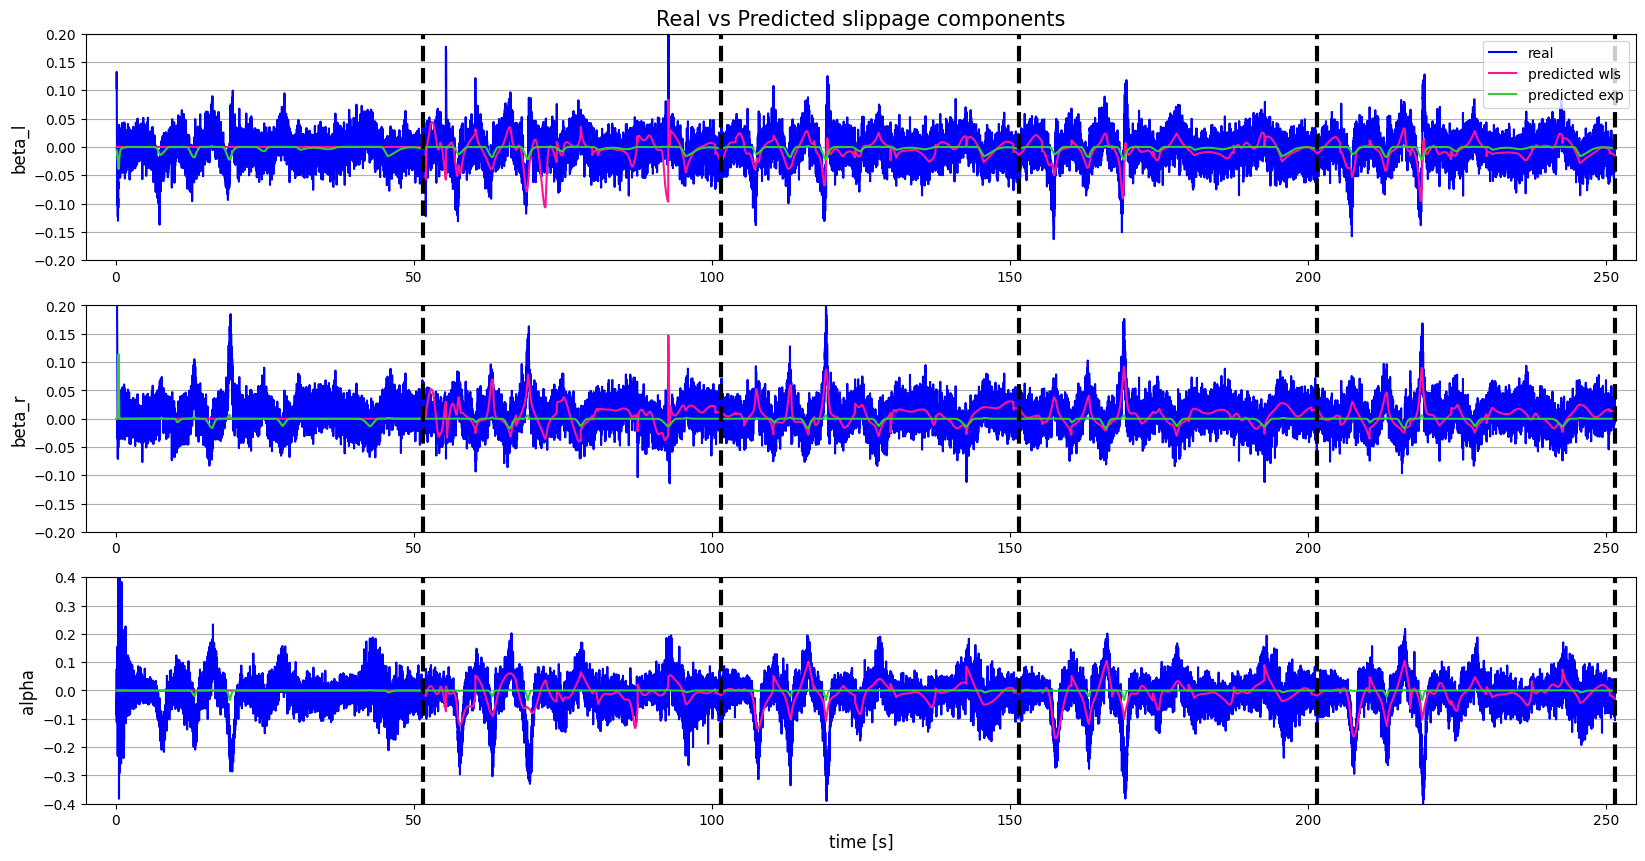

In [12]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.title("Real vs Predicted slippage components", fontsize=15)
plt.plot(time[lap_idx[0]:lap_idx[-1]],
         beta_l_wls[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_l_pred_wls[lap_idx[0]:lap_idx[-1]],
         color="deeppink", label="predicted wls")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_l_pred_exp[lap_idx[0]:lap_idx[-1]],
         color="limegreen", label="predicted exp")
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.2, 0.2)
plt.xlim(-5, 255)
plt.ylabel("beta_l", fontsize=12)
plt.legend()
plt.grid(True, axis="y")

plt.subplot(3, 1, 2)
plt.plot(time[lap_idx[0]:lap_idx[-1]],
         beta_r_wls[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_r_pred_wls[lap_idx[0]:lap_idx[-1]],
         color="deeppink", label="control")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_r_pred_exp[lap_idx[0]:lap_idx[-1]],
         color="limegreen", label="control")
for t in time[lap_idx[1:]]:
    plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.2, 0.2)
plt.xlim(-5, 255)
plt.ylabel("beta_r", fontsize=12)
plt.grid(True, axis="y")

plt.subplot(3, 1, 3)
plt.plot(time[lap_idx[0]:lap_idx[-1]],
         alpha_wls[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], alpha_pred_wls[lap_idx[0]:lap_idx[-1]],
         color="deeppink", label="control")
plt.plot(time[lap_idx[0]:lap_idx[-1]], alpha_pred_exp[lap_idx[0]:lap_idx[-1]],
         color="limegreen", label="control")
for t in time[lap_idx[1:]]:
    plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.4, 0.4)
plt.xlim(-5, 255)
plt.ylabel("alpha", fontsize=12)
plt.xlabel("time [s]", fontsize=12)
plt.grid(True, axis="y")

plt.savefig(osp.join(data_path, "real_vs_pred.pdf"),
            dpi=500, bbox_inches='tight')
plt.show()

In [13]:
ex_wls = np.array(joblib.load(osp.join(data_path, 'WLS_ex.bin')))
ex_exp = np.array(joblib.load(osp.join(data_path, 'EXP_ex.bin')))
ey_wls = np.array(joblib.load(osp.join(data_path, 'WLS_ey.bin')))
ey_exp = np.array(joblib.load(osp.join(data_path, 'EXP_ey.bin')))
etheta_wls = np.abs(np.array(joblib.load(
    osp.join(data_path, 'WLS_etheta.bin')))).flatten()
etheta_exp = np.abs(np.array(joblib.load(
    osp.join(data_path, 'EXP_etheta.bin')))).flatten()

In [14]:
exy_wls = np.linalg.norm(np.column_stack((ex_wls, ey_wls)), axis=1)
exy_exp = np.linalg.norm(np.column_stack((ex_exp, ey_exp)), axis=1)

In [15]:
ex_mean_wls = np.array([ex_wls[lap_idx[i]:lap_idx[i+1]].mean()
                       for i in range(len(lap_idx)-1)])
ex_mean_exp = np.array([ex_exp[lap_idx[i]:lap_idx[i+1]].mean()
                       for i in range(len(lap_idx)-1)])

ey_mean_wls = np.array([ey_wls[lap_idx[i]:lap_idx[i+1]].mean()
                       for i in range(len(lap_idx)-1)])
ey_mean_exp = np.array([ey_exp[lap_idx[i]:lap_idx[i+1]].mean()
                       for i in range(len(lap_idx)-1)])

etheta_mean_wls = np.array(
    [etheta_wls[lap_idx[i]:lap_idx[i+1]].mean() for i in range(len(lap_idx)-1)])
etheta_mean_exp = np.array(
    [etheta_exp[lap_idx[i]:lap_idx[i+1]].mean() for i in range(len(lap_idx)-1)])

In [16]:
exy_mean_wls = np.linalg.norm(
    np.column_stack((ex_mean_wls, ey_mean_wls)), axis=1)
exy_mean_exp = np.linalg.norm(
    np.column_stack((ex_mean_exp, ey_mean_exp)), axis=1)

In [17]:
exy_mean_plot_wls = np.zeros(len(ex_wls))
for i in range(len(lap_idx)-1):
    exy_mean_plot_wls[lap_idx[i]:lap_idx[i+1]] = exy_mean_wls[i]

exy_mean_plot_exp = np.zeros(len(ex_exp))
for i in range(len(lap_idx)-1):
    exy_mean_plot_exp[lap_idx[i]:lap_idx[i+1]] = exy_mean_exp[i]

In [18]:
etheta_mean_plot_wls = np.zeros(len(ex_wls))
for i in range(len(lap_idx)-1):
    etheta_mean_plot_wls[lap_idx[i]:lap_idx[i+1]] = etheta_mean_wls[i]

etheta_mean_plot_exp = np.zeros(len(ex_exp))
for i in range(len(lap_idx)-1):
    etheta_mean_plot_exp[lap_idx[i]:lap_idx[i+1]] = etheta_mean_exp[i]

In [19]:
# plt.figure(figsize=(20, 10))

# # First subplot
# plt.subplot(2, 1, 1)
# plt.title("Tracking error", fontsize=15)

# # Plot the mean error
# plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot_wls[lap_idx[0]:lap_idx[-1]],
#          color="deeppink", linewidth=4, label='wls error', zorder=100)
# plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot_exp[lap_idx[0]:lap_idx[-1]],
#          color="limegreen", linewidth=4, label='exp error', zorder=100)

# plt.legend()

# # Create a secondary y-axis for the error
# ax1 = plt.gca()
# ax2 = ax1.twinx()

# # Plot the error on the secondary y-axis
# ax2.plot(time[lap_idx[0]:lap_idx[-1]], exy_exp[lap_idx[0]:lap_idx[-1]], linestyle="solid", color="lightblue", label='Error')
# ax2.plot(time[lap_idx[0]:lap_idx[-1]], exy_wls[lap_idx[0]:lap_idx[-1]], color="blue", label='Error')

# # Set limits and labels
# plt.xlim(-5, 255)
# ax1.set_ylabel("mean abs error",fontsize=12)
# ax1.set_ylim(0)
# ax1.grid(True, axis="y")
# ax2.set_ylabel("|xy| [m]", color="blue", fontsize=12)
# ax1.spines['left'].set_color('red')
# ax2.tick_params(axis='y', colors='blue')
# ax2.spines['right'].set_color('blue')

# # Add vertical lines
# for t in time[lap_idx[1:]]:
#     plt.axvline(t, linestyle='dashed', linewidth=3, color="black")

# # Add grid to the primary y-axis

# # Second subplot
# plt.subplot(2, 1, 2)

# # Plot the mean error
# plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot_wls[lap_idx[0]:lap_idx[-1]],
#          color="deeppink", linewidth=4, label='Mean Error')
# plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot_exp[lap_idx[0]:lap_idx[-1]],
#          color="limegreen", linewidth=4, label='Mean Error')
# # Create a secondary y-axis for the error
# ax3 = plt.gca()
# ax4 = ax3.twinx()

# # Plot the error on the secondary y-axis
# ax4.plot(time[lap_idx[0]:lap_idx[-1]], etheta_exp[lap_idx[0]:lap_idx[-1]], linestyle="solid", color="lightblue", label='Error')
# ax4.plot(time[lap_idx[0]:lap_idx[-1]], etheta_wls[lap_idx[0]:lap_idx[-1]], color="blue", label='Error')

# # Set limits and labels
# plt.xlim(-5, 255)
# ax3.set_ylabel("mean abs error", fontsize=12)
# ax3.set_ylim(0)
# ax3.grid(True, axis="y")
# ax4.set_ylabel("|theta|", color="blue", fontsize=12)
# ax3.set_xlabel("time [s]", fontsize=12)
# ax3.spines['left'].set_color('red')
# ax4.tick_params(axis='y', colors='blue')
# ax4.spines['right'].set_color('blue')

# # Add vertical lines
# for t in time[lap_idx[1:]]:
#     plt.axvline(t, linestyle='dashed', linewidth=3, color="black")


# # Show the plot
# plt.savefig(osp.join(data_path, "tracking_err.pdf"), dpi=500, bbox_inches='tight')
# plt.show()

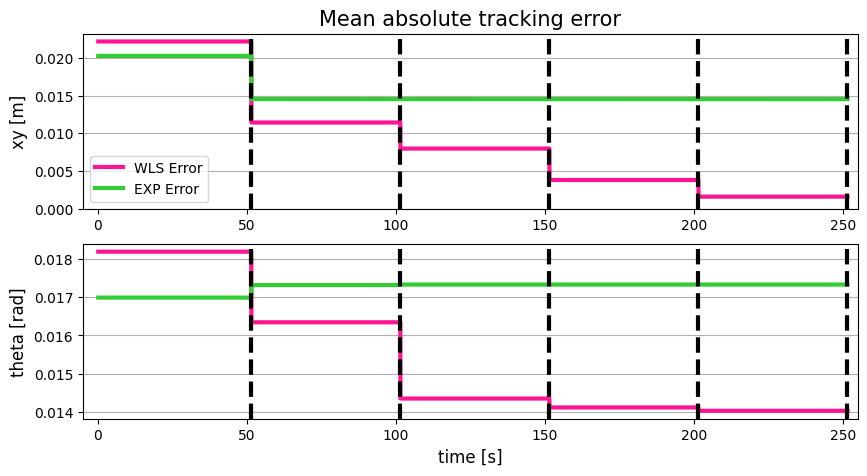

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# First subplot
plt.subplot(2, 1, 1)
plt.title("Mean absolute tracking error", fontsize=15)

# Plot the mean error on the primary y-axis
plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot_wls[lap_idx[0]:lap_idx[-1]],
         color="deeppink", linewidth=3, label='WLS Error')
plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot_exp[lap_idx[0]:lap_idx[-1]],
         color="limegreen", linewidth=3, label='EXP Error')

# Set limits and labels
plt.xlim(-5, 255)
plt.ylim(0)  # Adjust as necessary
plt.ylabel("xy [m]", fontsize=12)
plt.grid(True, axis="y")

# Add vertical lines
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")

plt.legend()

# Second subplot
plt.subplot(2, 1, 2)

# Plot the mean error on the primary y-axis
plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot_wls[lap_idx[0]:lap_idx[-1]],
         color="deeppink", linewidth=3, label='WLS Mean Error')
plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot_exp[lap_idx[0]:lap_idx[-1]],
         color="limegreen", linewidth=3, label='EXP Mean Error')

# Set limits and labels
plt.xlim(-5, 255)
# plt.ylim(0)  # Adjust as necessary
plt.ylabel("theta [rad]", fontsize=12)
plt.xlabel("time [s]", fontsize=12)
plt.grid(True, axis="y")

# Add vertical lines
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")

# Save and show the plot
plt.savefig(osp.join(data_path, "tracking_err.pdf"),
            dpi=500, bbox_inches='tight')
plt.show()

In [20]:
# plt.figure(figsize=(10, 5))

# plt.subplot(2, 1, 1)
# plt.title("Tracking error", fontsize=15)
# plt.plot( np.arange(1,len(exy_mean)+1),  exy_mean, color="red", linewidth=4)
# plt.ylabel("|xy| [m]", fontsize=12)
# plt.ylim(0)
# plt.grid(True, axis="y")

# plt.subplot(2, 1, 2)
# plt.plot(np.arange(1,len(etheta_mean)+1),  etheta_mean, color="red", linewidth=4)
# plt.ylabel("theta", fontsize=12)
# plt.grid(True, axis="y")
# plt.ylim(0)

# # plt.savefig(osp.join(data_path, "real_vs_pred.pdf"), dpi=500, bbox_inches='tight')
# plt.show()

In [22]:
df_wls = pd.read_csv(osp.join(data_path, 'robot_data_01.csv'),  index_col=0)

In [23]:
df_wls.wheel_l.min(), df_wls.wheel_l.max()

(np.float64(0.4267151266695041), np.float64(10.78306710094666))

In [24]:
df_wls.wheel_r.min(), df_wls.wheel_r.max()

(np.float64(2.059677336104444), np.float64(11.012253585858764))

In [25]:
degree = 3
iteration = 1

In [26]:
# Example data
omega_l_wls = df_wls.wheel_l.values
omega_r_wls = df_wls.wheel_r.values
beta_l_wls = df_wls.beta_l.values
beta_r_wls = df_wls.beta_r.values
alpha_wls = df_wls.alpha.values
Y = np.column_stack((beta_l_wls, beta_r_wls, alpha_wls))

# Initial OLS regression to get residuals
X = np.ones(len(omega_l_wls))[:, np.newaxis]
for d in range(1, degree + 1):
    X = np.column_stack((X, omega_l_wls**d, omega_r_wls**d))

# Initialize weights as OLS for the first iteration

weights_l = np.ones_like(Y[:, 0])
weights_r = np.ones_like(Y[:, 1])
weights_alpha = np.ones_like(Y[:, 2])

# Create individual diagonal weight matrices for each output
W_l = np.diag(weights_l)
W_r = np.diag(weights_r)
W_alpha = np.diag(weights_alpha)

# Combine these into a block diagonal matrix
W = block_diag(W_l, W_r, W_alpha)

for _ in range(iteration+1):

    X_expanded = np.kron(np.eye(3), X)
    F_0 = X_expanded.T @ W @ X_expanded
    a_0 = X_expanded.T @ W @ Y.flatten(order='F')
    # Now compute WLS using the expanded X and Y
    XTWX_inv = np.linalg.inv(F_0)
    XTWy = a_0
    theta_hat_wls = (XTWX_inv @ XTWy).reshape(3, -1).T

    y_hat_wls = X @ theta_hat_wls
    residuals_wls = Y - y_hat_wls

    # Estimate weights as the inverse of the residuals norm
    weights_l = 1 / np.abs(residuals_wls[:, 0] + 1e-10)
    weights_r = 1 / np.abs(residuals_wls[:, 1] + 1e-10)
    weights_alpha = 1 / np.abs(residuals_wls[:, 2] + 1e-10)

    # recompute weights matrix
    W_l = np.diag(weights_l)
    W_r = np.diag(weights_r)
    W_alpha = np.diag(weights_alpha)

    W = block_diag(W_l, W_r, W_alpha)

In [27]:
df_gt = pd.read_csv(osp.join(data_path, 'ident_wheels_sim_0.1.csv'), header=None, names=[
                    'wheel_l', 'wheel_r', 'beta_l', 'beta_r', 'alpha'])
df_gt = df_gt[(df_gt.wheel_l >= 0.5) & (df_gt.wheel_r >= 2)]
df_gt = df_gt[(df_gt.wheel_l <= 11) & (df_gt.wheel_r <= 11)]

In [28]:
v = (df_gt.wheel_l + df_gt.wheel_r) / 2 * 0.0856
idx_filter = v > 0.01
filtered = df_gt[idx_filter]

In [29]:
omega_l_gt = filtered.wheel_l.values
omega_r_gt = filtered.wheel_r.values
beta_l_gt = filtered.beta_l.values
beta_r_gt = filtered.beta_r.values
alpha_gt = filtered.alpha.values

In [30]:
X = np.ones(len(omega_l_gt))[:, np.newaxis]
for d in range(1, degree + 1):
    X = np.column_stack((X, omega_l_gt**d, omega_r_gt**d))

Y = np.column_stack((beta_l_gt, beta_r_gt, alpha_gt))

In [31]:
y_hat_wls_gt = X @ theta_hat_wls

In [32]:
print(f"beta_l_gt r2: wls={r2_score(Y[...,0], y_hat_wls_gt[...,0])}")
print(f"beta_r_gt r2: wls={r2_score(Y[...,1], y_hat_wls_gt[...,1])}")
print(f"alpha_gt r2: wls={r2_score(Y[...,2], y_hat_wls_gt[...,2])}")

beta_l_gt r2: wls=0.5377474045269104
beta_r_gt r2: wls=0.906868545150331
alpha_gt r2: wls=0.819931354968001


In [33]:
omega_l_grid, omega_r_grid = np.meshgrid(np.linspace(omega_l_gt.min(), omega_l_gt.max(), 10),
                                         np.linspace(omega_r_gt.min(), omega_r_gt.max(), 10))

In [34]:
# Extract coefficients from WLS estimation
# Coefficients for beta_l
theta_0_l, theta_1_l, theta_2_l, theta_3_l, theta_4_l, theta_5_l, theta_6_l = theta_hat_wls[
    :, 0]
# Coefficients for beta_r
theta_0_r, theta_1_r, theta_2_r, theta_3_r, theta_4_r, theta_5_r, theta_6_r = theta_hat_wls[
    :, 1]
# Coefficients for alpha
theta_0_alpha, theta_1_alpha, theta_2_alpha, theta_3_alpha, theta_4_alpha, theta_5_alpha, theta_6_alpha = theta_hat_wls[
    :, 2]


# Calculate the corresponding beta_l, beta_r, and alpha values on the grid
beta_l_grid_wls = theta_0_l + theta_1_l * omega_l_grid + theta_2_l * omega_r_grid + theta_3_l * \
    omega_l_grid**2 + theta_4_l * omega_r_grid**2 + \
    theta_5_l * omega_l_grid**3 + theta_6_l * omega_r_grid**3

beta_r_grid_wls = theta_0_r + theta_1_r * omega_l_grid + theta_2_r * omega_r_grid + theta_3_r * \
    omega_l_grid**2 + theta_4_r * omega_r_grid**2 + \
    theta_5_r * omega_l_grid**3 + theta_6_r * omega_r_grid**3

alpha_grid_wls = theta_0_alpha + theta_1_alpha * omega_l_grid + theta_2_alpha * omega_r_grid + theta_3_alpha * \
    omega_l_grid**2 + theta_4_alpha * omega_r_grid**2 + \
    theta_5_alpha * omega_l_grid**3 + theta_6_alpha * omega_r_grid**3

In [35]:
%matplotlib inline
# %matplotlib tk

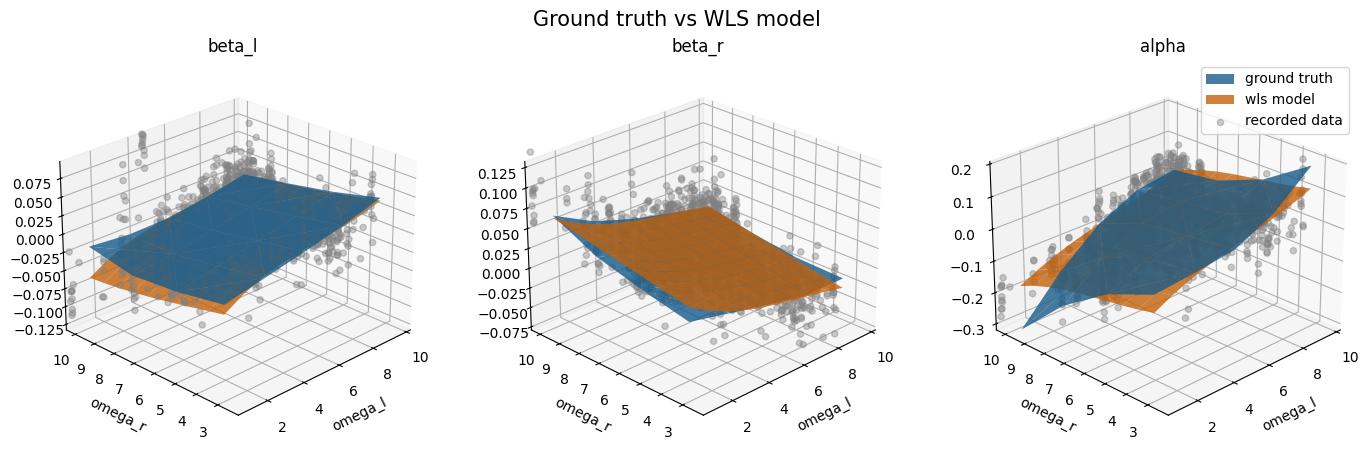

In [36]:
fig = plt.figure(figsize=(17, 5))
fig.suptitle("Ground truth vs WLS model", fontsize=15)

# Beta_l residuals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(omega_l_wls, omega_r_wls, beta_l_wls, color="gray", alpha=0.4)
ax1.plot_trisurf(omega_l_gt, omega_r_gt, beta_l_gt, alpha=0.8)
ax1.plot_surface(omega_l_grid, omega_r_grid, beta_l_grid_wls, alpha=0.8)
ax1.set_xlabel("omega_l")
ax1.set_ylabel("omega_r")
ax1.set_title("beta_l")
ax1.view_init(25, 225)

# Adjust the axis limits to zoom in
ax1.set_xlim(min(omega_l_wls), max(omega_l_wls)
             * 0.95)  # Adjust limits as needed
ax1.set_ylim(min(omega_r_wls), max(omega_r_wls) * 0.95)
ax1.set_zlim(min(beta_l_wls), max(beta_l_wls) * 0.95)

# Beta_r residuals
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_trisurf(omega_l_gt, omega_r_gt, beta_r_gt, alpha=0.8)
ax2.plot_surface(omega_l_grid, omega_r_grid, beta_r_grid_wls, alpha=0.8)
ax2.scatter(omega_l_wls, omega_r_wls, beta_r_wls, color="gray", alpha=0.4)
ax2.set_xlabel("omega_l")
ax2.set_ylabel("omega_r")
ax2.set_title("beta_r")
ax2.view_init(25, 225)

# Adjust the axis limits to zoom in
ax2.set_xlim(min(omega_l_wls), max(omega_l_wls) * 0.95)
ax2.set_ylim(min(omega_r_wls), max(omega_r_wls) * 0.95)
ax2.set_zlim(min(beta_r_wls), max(beta_r_wls) * 0.95)

# Alpha residuals
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_trisurf(omega_l_gt, omega_r_gt, alpha_gt,
                 alpha=0.8, label="ground truth")
ax3.plot_surface(omega_l_grid, omega_r_grid, alpha_grid_wls,
                 alpha=0.8, label="wls model")
ax3.scatter(omega_l_wls, omega_r_wls, alpha_wls,
            color="gray", alpha=0.4, label="recorded data")
ax3.legend()
ax3.set_xlabel("omega_l")
ax3.set_ylabel("omega_r")
ax3.set_title("alpha")
ax3.view_init(25, 225)

# Adjust the axis limits to zoom in
ax3.set_xlim(min(omega_l_wls), max(omega_l_wls) * 0.95)
ax3.set_ylim(min(omega_r_wls), max(omega_r_wls) * 0.95)
ax3.set_zlim(min(alpha_wls), max(alpha_wls) * 0.95)

plt.savefig(osp.join(data_path, "gt_vs_wls.pdf"), dpi=500, bbox_inches='tight')
plt.show()